In [3]:
import pandas as pd

In [4]:
df = pd.read_excel(r'C:\Users\HP\Desktop\viral load\updated_research_data.xlsx')

In [4]:
df.head()

,Age,Sex,Marital Status,Educational Level,Residence,Religion,BMI,WHO Stage,Duration on ART in Months,TB screening Result,FunctionalStatus,Baseline CD4 Count,Recent CD4 Count,Adherance,Regimen Line,TPT Started,CPT Use,Baseline_CD4_Category,Recent_CD4_Category,viral_load_status
0,48,M,Married,Secondary Education,Urban,Orthodox,Normal,4,251.0,No,Working,507,0.0,Good,Second Line,Yes,Yes,Normal,Normal,Undetectable
1,49,F,Married,Secondary Education,Urban,Orthodox,Normal,4,254.0,No,Working,480,819.0,Good,First Line,Yes,Yes,Low,Normal,Suppressed
2,67,M,Married,Secondary Education,Rural,Orthodox,Normal,1,52.0,No,Working,56,56.0,Poor,First Line,No,Yes,Low,Low,Suppressed
3,80,M,Married,Secondary Education,Rural,Orthodox,Obese,1,65.0,No,Working,240,447.5,Poor,First Line,No,No,High,High,Suppressed
4,53,M,Married,Secondary Education,Rural,Orthodox,Normal,1,88.0,No,Working,240,447.5,Poor,First Line,No,No,High,High,Suppressed


In [5]:
df.shape

(4152, 20)

In [8]:
df.info

<bound method DataFrame.info of       Age Sex Marital Status    Educational Level Residence  Religion  \
0      48   M        Married  Secondary Education     Urban  Orthodox   
1      49   F        Married  Secondary Education     Urban  Orthodox   
2      67   M        Married  Secondary Education     Rural  Orthodox   
3      80   M        Married  Secondary Education     Rural  Orthodox   
4      53   M        Married  Secondary Education     Rural  Orthodox   
...   ...  ..            ...                  ...       ...       ...   
4147   65   F        Married  Secondary Education     Urban  Orthodox   
4148   34   F       Divorced         No Education     Rural  Orthodox   
4149   52   F        Married  Secondary Education     Urban  Orthodox   
4150   47   F        Married  Secondary Education     Urban  Orthodox   
4151   60   M        Married         No Education     Urban  Orthodox   

             BMI  WHO Stage  Duration on ART in Months TB screening Result  \
0         Nor

In [6]:
df.isnull().sum()

Age                          0
Sex                          0
Marital Status               0
Educational Level            0
Residence                    0
Religion                     0
BMI                          0
WHO Stage                    0
Duration on ART in Months    0
TB screening Result          0
FunctionalStatus             0
Baseline CD4 Count           0
Recent CD4 Count             0
Adherance                    0
Regimen Line                 0
TPT Started                  0
CPT Use                      0
Baseline_CD4_Category        0
Recent_CD4_Category          0
viral_load_status            0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_12200\4189049922.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['viral_load_status'], palette='coolwarm')


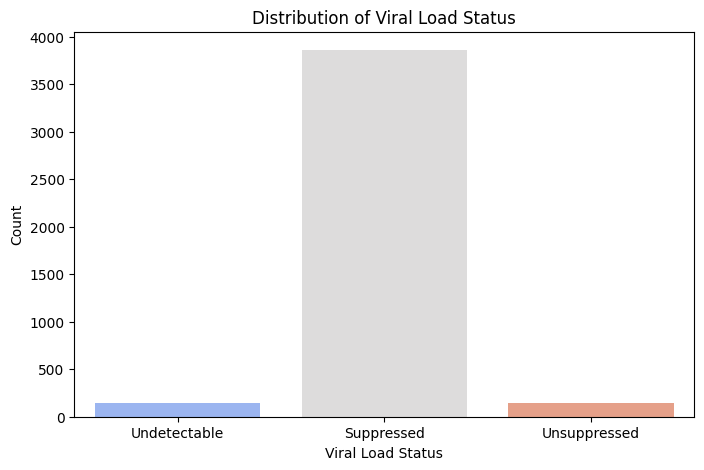

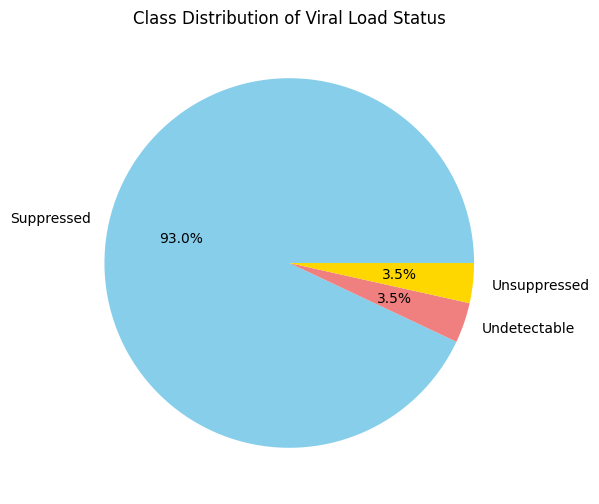

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of Viral_Load_Status
plt.figure(figsize=(8, 5))
sns.countplot(x=df['viral_load_status'], palette='coolwarm')
plt.title("Distribution of Viral Load Status")
plt.xlabel("Viral Load Status")
plt.ylabel("Count")
plt.show()

# Pie chart for class distribution
plt.figure(figsize=(6, 6))
df['viral_load_status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold'])
plt.title("Class Distribution of Viral Load Status")
plt.ylabel("")  # Remove y-label for aesthetics
plt.show()


In [9]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Encode target variable numerically (if not already)
le = LabelEncoder()
df['viral_load_status_encoded'] = le.fit_transform(df['viral_load_status'])

# Define feature matrix X and target variable y
X = df.drop(columns=['viral_load_status', 'viral_load_status_encoded'])  # Drop target variable from features
y = df['viral_load_status_encoded']  # Target variable

# Ensure all columns in X are numeric by encoding categorical variables
X = pd.get_dummies(X, drop_first=True)  # This will convert categorical features to numeric using one-hot encoding

# Calculate for original data
original_skew = skew(y)
original_kurt = kurtosis(y)

# After SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
smote_skew = skew(y_smote)
smote_kurt = kurtosis(y_smote)

# After under-sampling
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X, y)
under_skew = skew(y_under)
under_kurt = kurtosis(y_under)

# Output the results
print("Original Skew:", original_skew)
print("Original Kurtosis:", original_kurt)
print("SMOTE Skew:", smote_skew)
print("SMOTE Kurtosis:", smote_kurt)
print("Under-sampling Skew:", under_skew)
print("Under-sampling Kurtosis:", under_kurt)


Original Skew: 3.947753425054751
Original Kurtosis: 14.623577590483286
SMOTE Skew: 0.0
SMOTE Kurtosis: -1.5
Under-sampling Skew: 0.0
Under-sampling Kurtosis: -1.5


In [10]:
df.describe()

,Age,WHO Stage,Duration on ART in Months,Baseline CD4 Count,Recent CD4 Count,viral_load_status_encoded
count,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000,4152.000000
mean,46.721580,2.778902,138.486272,284.976879,459.222303,0.105010
std,11.377156,1.461052,71.067894,206.974429,263.105400,0.404806
min,18.000000,1.000000,6.000000,21.000000,0.000000,0.000000
25%,40.000000,1.000000,84.000000,160.000000,299.750000,0.000000
50%,47.000000,4.000000,152.500000,240.000000,447.500000,0.000000
75%,54.000000,4.000000,200.000000,345.000000,583.000000,0.000000
max,88.000000,4.000000,258.000000,1896.000000,2462.000000,2.000000


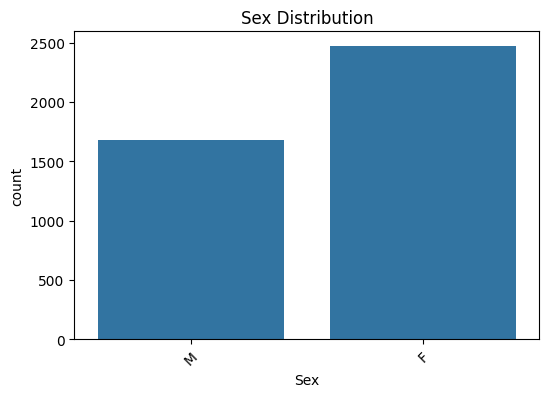

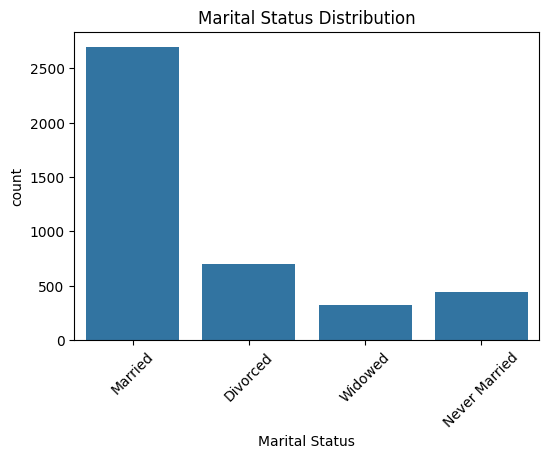

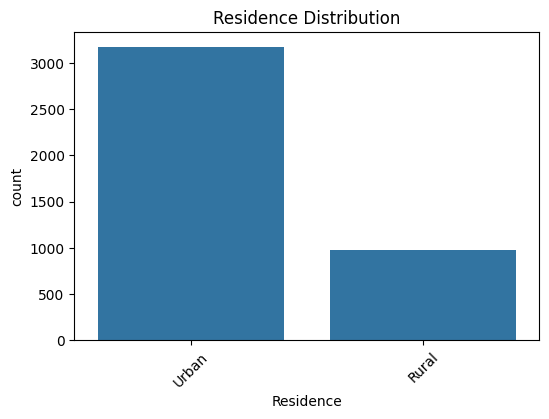

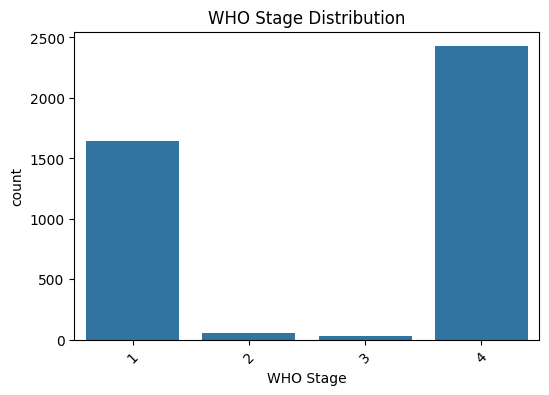

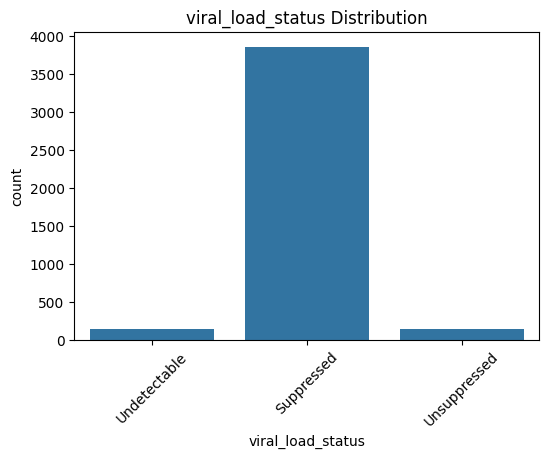

In [14]:
categorical_cols = ['Sex', 'Marital Status', 'Residence', 'WHO Stage', 'viral_load_status']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['Sex', 'Marital Status', 'Educational Level', 'Residence', 'Religion',
                    'TB screening Result', 'viral_load_status', 'Adherance', 'Regimen Line',
                    'TPT Started', 'CPT Use','Baseline_CD4_Category', 'Recent_CD4_Category']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Verify encoding
df.head()

,Age,Sex,Marital Status,Educational Level,Residence,Religion,BMI,WHO Stage,Duration on ART in Months,TB screening Result,FunctionalStatus,Baseline CD4 Count,Recent CD4 Count,Adherance,Regimen Line,TPT Started,CPT Use,Baseline_CD4_Category,Recent_CD4_Category,viral_load_status
0,48,1,1,3,1,2,Normal,4,251.0,0,Working,507,0.0,1,1,1,1,2,2,1
1,49,0,1,3,1,2,Normal,4,254.0,0,Working,480,819.0,1,0,1,1,1,2,0
2,67,1,1,3,0,2,Normal,1,52.0,0,Working,56,56.0,2,0,0,1,1,1,0
3,80,1,1,3,0,2,Obese,1,65.0,0,Working,240,447.5,2,0,0,0,0,0,0
4,53,1,1,3,0,2,Normal,1,88.0,0,Working,240,447.5,2,0,0,0,0,0,0


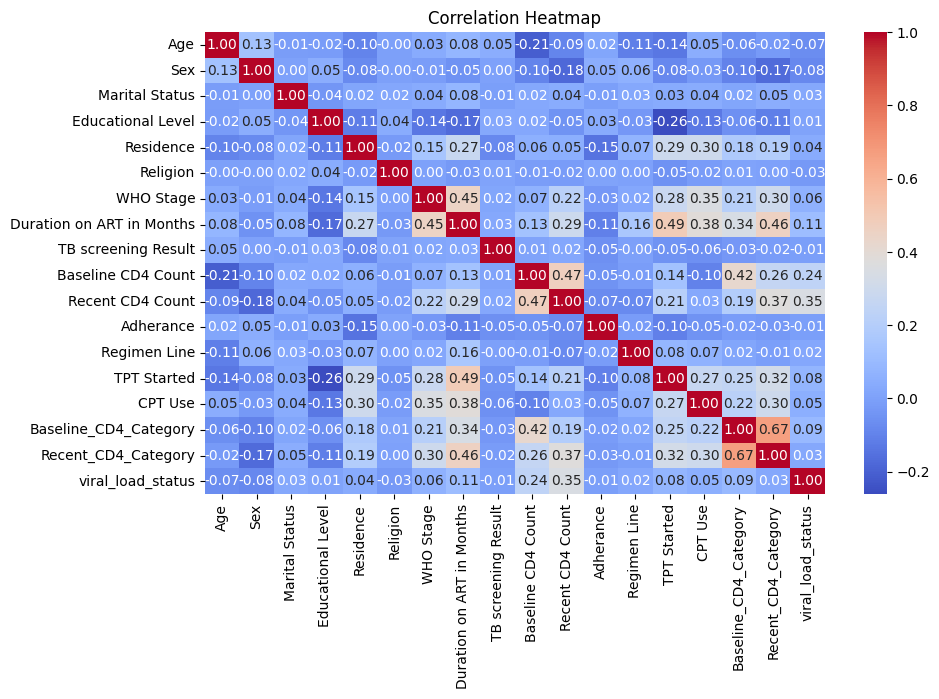

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()